# <center>Постоянная миграция и эмиграция в 2011-2019</center>

## <center>Апдейт</center>

Датасет был обновлён **01.07.2022** - посмотрим, что у нас будет с переездами в Санкт-Петербург и Москву, исчезли ли повторяющиеся значения.

In [42]:
import dask.dataframe as dd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import seaborn as sns

Считываем через `dask`, потому что теперь всё лежит в одном датафрейме, который слишком велик:

In [43]:
data = dd.read_csv('data.csv', sep=';', low_memory=False, dtype={'age_group': 'object',
       'area_type': 'object',
       'indicator_value': 'float64',
       'methodology': 'object',
       'sex': 'object',
       'month': 'object',
       'birth_order': 'object', 
       'mother_marital_status': 'object',
       'death_cause': 'object',
       'bride_age': 'object',
       'groom_age': 'object',
       'country': 'object', 
       'migration_direction': 'object',
       'region': 'object',
       'territory_type': 'object',
       'citizenship': 'object',
       'registration_type': 'object'})
display(data.head(20))
print(data.info())

,id,object_name,object_oktmo,object_okato,year,indicator_name,indicator_unit,original_unit,area_type,age_group,...,migration_direction,country,region,territory_type,registration_type,citizenship,indicator_value,original_accuracy,methodology,notes
0,1,Алтайский край,1000000000,1000000000,2012,Число городов,единица,единица,9,9,...,9,9,9,9,9,9,12.0,0.0,9,На 1 января 2012 года
1,2,Амурская область,10000000000,10000000000,2012,Число городов,единица,единица,9,9,...,9,9,9,9,9,9,9.0,0.0,9,На 1 января 2012 года
2,3,Архангельская область,11000000000,11000000000,2012,Число городов,единица,единица,9,9,...,9,9,9,9,9,9,14.0,0.0,9,На 1 января 2012 года
3,4,Архангельская область без Ненецкого автономног...,99999999999,99999999999,2012,Число городов,единица,единица,9,9,...,9,9,9,9,9,9,13.0,0.0,9,На 1 января 2012 года
4,5,Астраханская область,12000000000,12000000000,2012,Число городов,единица,единица,9,9,...,9,9,9,9,9,9,6.0,0.0,9,На 1 января 2012 года
5,6,Белгородская область,14000000000,14000000000,2012,Число городов,единица,единица,9,9,...,9,9,9,9,9,9,11.0,0.0,9,На 1 января 2012 года
6,7,Брянская область,15000000000,15000000000,2012,Число городов,единица,единица,9,9,...,9,9,9,9,9,9,16.0,0.0,9,На 1 января 2012 года
7,8,Владимирская область,17000000000,17000000000,2012,Число городов,единица,единица,9,9,...,9,9,9,9,9,9,23.0,0.0,9,На 1 января 2012 года
8,9,Волгоградская область,18000000000,18000000000,2012,Число городов,единица,единица,9,9,...,9,9,9,9,9,9,19.0,0.0,9,На 1 января 2012 года
9,10,Вологодская область,19000000000,19000000000,2012,Число городов,единица,единица,9,9,...,9,9,9,9,9,9,15.0,0.0,9,На 1 января 2012 года


<class 'dask.dataframe.core.DataFrame'>
Columns: 28 entries, id to notes
dtypes: object(21), float64(2), int64(5)None


Пробуем выделить Санкт-Петербург по старой логике:

In [44]:
spb_in = data[(data['region'] == 'Санкт-Петербург') & 
              (data['registration_type'] == 'прибыли и зарегистрированы в новом месте жительства')].compute()
spb_in = spb_in[['region', 'year', 'indicator_value']]
display(spb_in)

,region,year,indicator_value
89300,Санкт-Петербург,2011,49690.0
89301,Санкт-Петербург,2012,59634.0
89302,Санкт-Петербург,2013,66816.0
89303,Санкт-Петербург,2014,73590.0
89304,Санкт-Петербург,2015,73439.0
89305,Санкт-Петербург,2016,76178.0
89306,Санкт-Петербург,2017,83518.0
89307,Санкт-Петербург,2018,81309.0
89308,Санкт-Петербург,2019,76631.0


Да, всё получилось. Делаем то же самое для Москвы и строим график:

In [45]:
moscow_in = data[(data['region'] == 'Москва') & 
              (data['registration_type'] == 'прибыли и зарегистрированы в новом месте жительства')].compute()
moscow_in = moscow_in[['region', 'year', 'indicator_value']]
display(moscow_in)

,region,year,indicator_value
86060,Москва,2011,39981.0
86061,Москва,2012,54877.0
86062,Москва,2013,47413.0
86063,Москва,2014,50782.0
86064,Москва,2015,47083.0
86065,Москва,2016,44153.0
86066,Москва,2017,44861.0
86067,Москва,2018,50367.0
86068,Москва,2019,43104.0


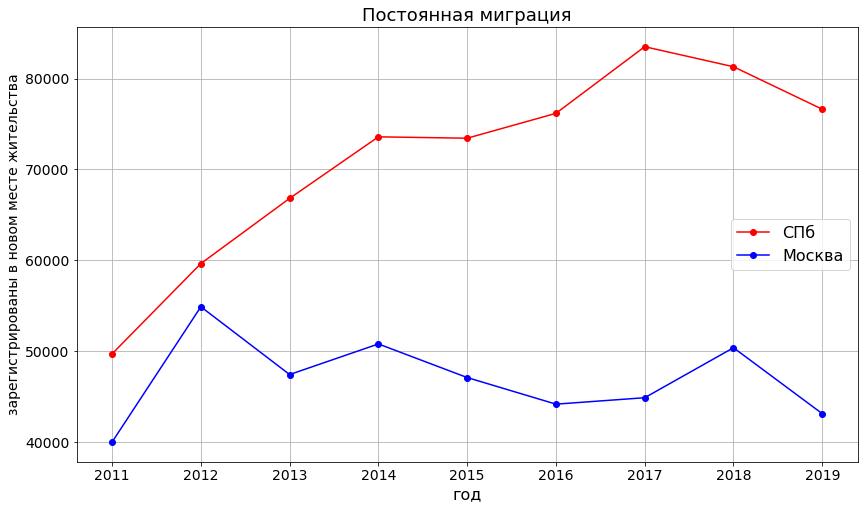

In [46]:
spb_in['indicator_value'] = spb_in['indicator_value'].astype('int64')
moscow_in['indicator_value'] = moscow_in['indicator_value'].astype('int64')

plt.figure(figsize=(14, 8))
plt.plot(spb_in['year'], spb_in['indicator_value'], color='red', marker='o', label='СПб')
plt.plot(moscow_in['year'], moscow_in['indicator_value'], color='blue', marker='o', label='Москва')
plt.title('Постоянная миграция', fontsize=18)
plt.xlabel('год', fontsize=16)
plt.xticks(fontsize=14)
plt.ylabel('зарегистрированы в новом месте жительства', fontsize=14)
plt.yticks(fontsize=14)
plt.grid(True)
plt.legend(loc='center right', fontsize=16)
plt.show()

Замечательно! Осталось пересчитать топ-10 мест постоянной миграции с учётом этих изменений:

In [49]:
permament_migration = data[(data['registration_type'] == 'прибыли и зарегистрированы в новом месте жительства') & 
                           (data['year'] >= 2011)].compute()

top_in = pd.pivot_table(permament_migration, index='region', values='indicator_value', aggfunc='sum').sort_values(
    by='indicator_value', ascending=False)
top_in['indicator_value'] = top_in['indicator_value'].astype('int64')

#убираем фед. округа и общую сумму, а также появившуюся заглушку 9
top_in = top_in[(top_in.index.str.contains('федеральный округ') == False) & 
                (top_in.index.str.contains('Федерация') == False) &  
                (top_in.index.str.contains('9') == False)]

#Выводим топ-10
display(top_in.head(10))

,indicator_value
region,
Московская область,961704
Республика Башкортостан,697546
Тюменская область,654370
Санкт-Петербург,640805
Краснодарский край,564404
Ростовская область,492028
Республика Татарстан (Татарстан),489523
Красноярский край,463524
Свердловская область,448925


In [50]:
def tops_plot(series, N, name):
    series_plot = series.head(N)
    plt.figure(figsize=(12, 12))
    plt.barh(series_plot.index, series_plot['indicator_value'])
    plt.title(name, fontsize=18)
    plt.xticks(fontsize=14)
    plt.ticklabel_format(style='plain', axis='x')
    plt.yticks(fontsize=14)
    plt.grid(True)
    plt.gca().invert_yaxis()
    plt.show()

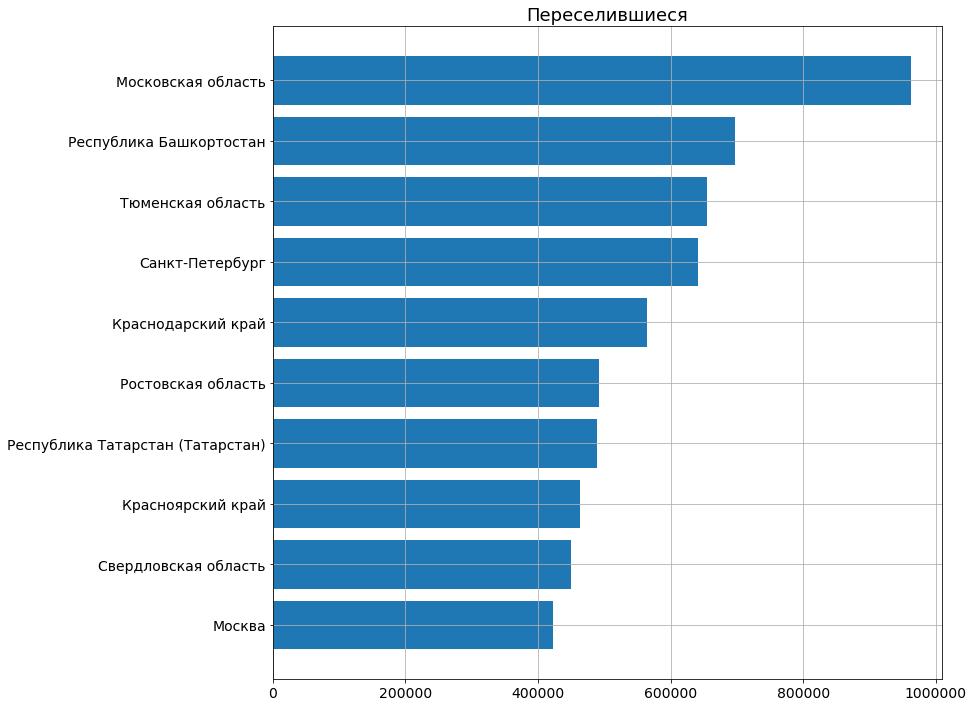

In [51]:
tops_plot(top_in, 10, 'Переселившиеся')

И здесь у нас никаких изменений, кроме того, что Санкт-Петербург чуть-чуть приблизился к Тюменской области. Никакого изменения в порядке не произошло.